<font color="#CA3532"><h1 align="left">Clustering</h1></font>
<h2 align="left">Wines dataset</h2>

In [ ]:
COLAB = True

First we import the libraries we will need. In addition we will use the first code cell to activate the *inline* mode for the graphics generated by *matplotlib*. We also initialize the seed of the random generator.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Load

Now we will use clustering in a wine database. The goal is to check if the clustering discovers the different real wine types.

The database describes the parameters of different wine instances. There are 3 types of wine and 13 wine features with the levels of the most important indicators:
- Alcohol
- Malic acid
- Ash
- Ash alcalinity
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280_OD315
- Proline

Now we load this database:


In [ ]:
if COLAB:
  !mkdir datasets
  aux = "'https://docs.google.com/uc?export=download&id=1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR&confirm=t'"
  !wget $aux -O ./datasets/wine_dataset.csv

data = pd.read_csv('datasets/wine_dataset.csv', delimiter=';', header=0)

print('Wine Database\n')
print('Number of real classes (wine types):', np.unique(data['Type']).shape[0])
print('Unique class labels:', np.unique(data['Type']))
print('\nFirst instances:')
data.head()

--2023-11-03 19:27:00--  https://docs.google.com/uc?export=download&id=1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR&confirm=t
Resolving docs.google.com (docs.google.com)... 172.253.122.139, 172.253.122.113, 172.253.122.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.122.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/juc63tnitmugg1ovdanj38ep6kkerkf5/1699039575000/17112108692206476645/*/1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR?e=download&uuid=0fcd40c1-3b36-40c4-8b58-31dde5f74ca2 [following]
--2023-11-03 19:27:01--  https://doc-0k-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/juc63tnitmugg1ovdanj38ep6kkerkf5/1699039575000/17112108692206476645/*/1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR?e=download&uuid=0fcd40c1-3b36-40c4-8b58-31dde5f74ca2
Resolving doc-0k-8k-docs.googleusercontent.com (doc-0k-8k-docs.googleusercontent.com)... 172.253.63.1

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
abro_negrita = '\033[1m'
cierro_negrita = '\033[0m'
print(abro_negrita + 'Wine Database\n' + cierro_negrita )
print('Number of real classes (wine types): %d' % np.unique(data['Type']).shape[0])
print('Unique class labels:', np.unique(data['Type']))
print('\nFirst 5 instances:\n')
data.head(3)

Wine Database

Number of real classes (wine types): 3
Unique class labels: ['A' 'B' 'C']

First 5 instances:



,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


## Data Description

In [ ]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
data.isnull().sum().sum()

0

## Data Exploration

In [ ]:
class_column = 'Type'
classes_names = data['Type'].unique()
attribute_columns = list(data.columns)
attribute_columns.remove(class_column)

print(class_column)
print(classes_names)
print(attribute_columns)

Type
['A' 'B' 'C']
['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline']


After loading the database we need to do some basic preprocessing: standarization and PCA:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

attribute_columns = list(data.columns.values)
attribute_columns.remove('Type')

print(attribute_columns)

X = data[attribute_columns]
y = data["Type"]

['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline']


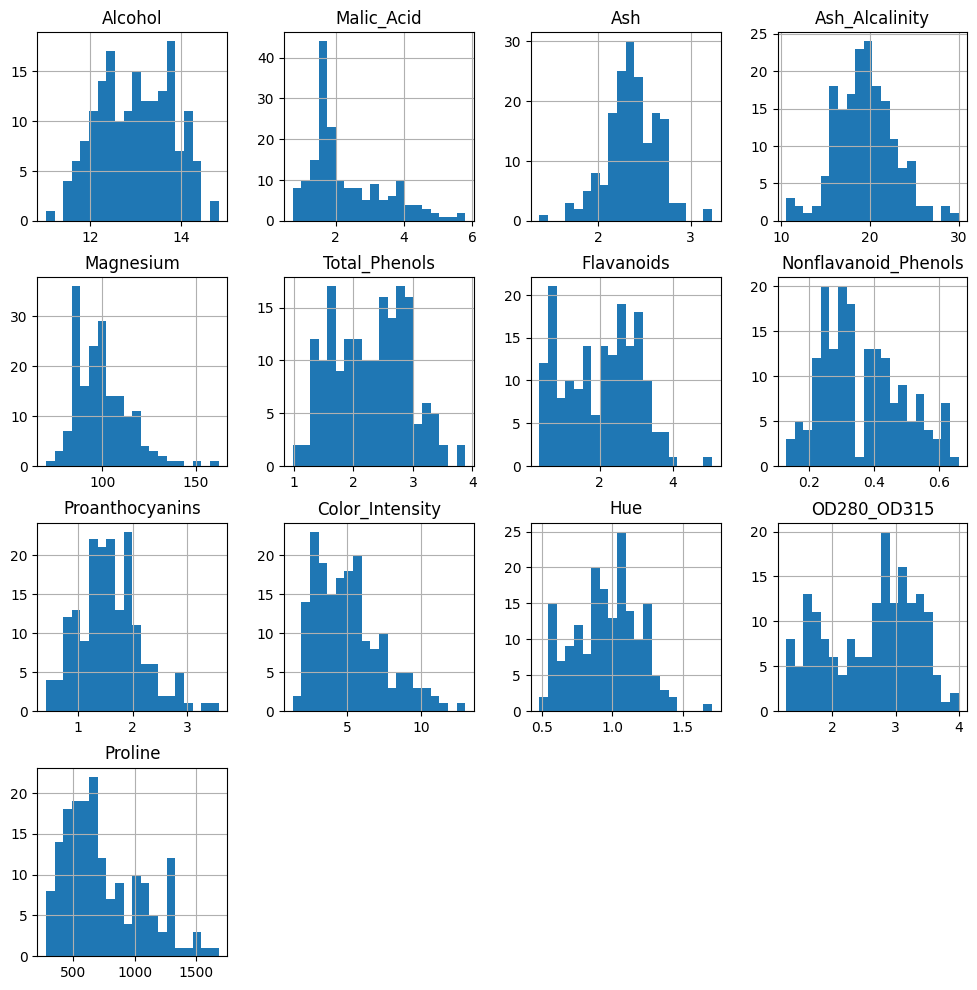

In [ ]:
data.hist(bins=20, figsize=(12,12), layout=(-1,4));

# Clustering with k-means

In [ ]:
clean_data = data[attribute_columns].copy()
attributes_names = attribute_columns

y = np.array(data[class_column])
X = np.array(clean_data[attribute_columns])

Basic preprocessing: standarization and PCA.

In [ ]:
X_std = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=5).fit_transform(X_std)

pd.DataFrame(X_pca).describe()

# IMPORTANT: note that we have used all the patterns in the dataset
# to fit the parameters of StandardScaler and PCA
# This is ONLY ok if we are NOT going to develop a predictive model
# for "y" using this data (in that case, we would use both training and test
# data for fitting the parameters, and using test data for fitting is forbidden!)
#
# If we were going to develop a model for predicting the value
# of a target variable "y" (classification / regression problem),
# first we would need to split the dataset in training and test sets:
#
# testsize = 0.2
# Xaux_train, Xaux_test, y_train, y_test = train_test_split(Xaux, y, test_size=testsize)
#
# and both the normalization and PCA should be fitted using only the training set:
#
# std_scaler = StandardScaler()
# std_scaler.fit(Xaux_train)
# X_std_train = std_scaler.transform(Xaux_train)
# pca = PCA(n_components=2)
# pca.fit(X_std_train)
# X_train = pca.transform(X_std_train)
#
# X_std_test = std_scaler.transform(Xaux_test)
# X_test = pca.transform(X_std_test)


,0,1,2,3,4
count,178.000000,1.780000e+02,178.000000,1.780000e+02,1.780000e+02
mean,0.000000,-3.991813e-17,0.000000,3.991813e-17,-2.993860e-17
std,2.175417,1.584639e+00,1.205920,9.613355e-01,9.263092e-01
min,-4.280639,-3.515090e+00,-4.585064,-2.890120e+00,-2.023127e+00
25%,-2.172762,-1.233675e+00,-0.831188,-6.860538e-01,-5.734337e-01
50%,0.060511,-2.620302e-01,-0.141612,-2.579312e-02,-2.658996e-01
75%,2.001293,1.398300e+00,0.760061,5.871144e-01,3.550493e-01
max,4.312784,3.871784e+00,5.345388,3.790335e+00,4.186657e+00


Now we perform k-means searching the optimal number of clusters according to the Calinski-Harabasz score:

In [ ]:
#from sklearn.metrics import silhouette_score as qmetric
from sklearn.metrics import calinski_harabasz_score as qmetric
from sklearn.cluster import KMeans

X_km = X_pca
#X_km = X_std

Nclusters_max = 15
Nrepetitions = 100

qualities = []
inertias = []
models = []
for k in range(1,Nclusters_max+1):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++', n_init=Nrepetitions,
                    max_iter=500, random_state=2)
    kmeans.fit(X_km)
    models.append(kmeans)
    inertias.append(kmeans.inertia_)
    if k >1:
        qualities.append(qmetric(X_km, kmeans.labels_))
    else:
        qualities.append(0)

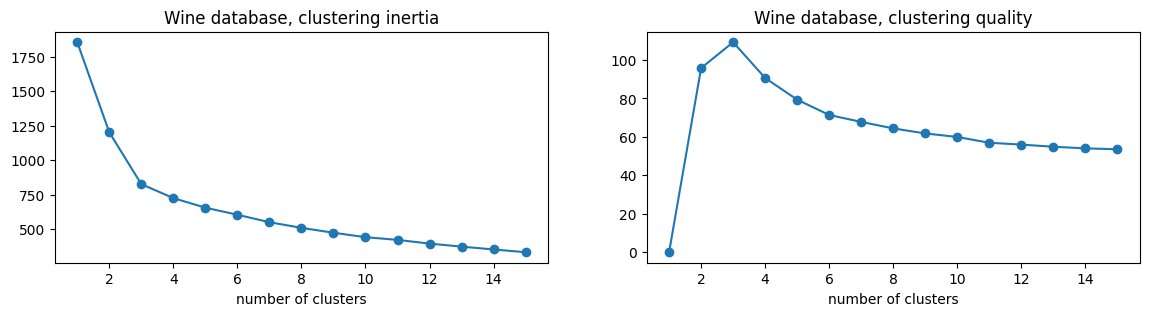

In [ ]:
fig = plt.figure(figsize=(14,3))

ax = plt.subplot(1,2,1)
plt.plot(range(1,Nclusters_max+1), inertias, marker='o')
plt.xlabel('number of clusters')
plt.title('Wine database, clustering inertia')

ax = plt.subplot(1,2,2)
plt.plot(range(1,Nclusters_max+1), qualities, marker='o')
plt.xlabel('number of clusters')
plt.title('Wine database, clustering quality')
plt.show()

best = pd.Series(qualities).idxmax() # get index for the best model
kmeans = models[best]
n_clusters = kmeans.get_params()['n_clusters']

In [ ]:
data.shape

(178, 14)

In [ ]:
kmeans.cluster_centers_

array([[-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02]])

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

<ipython-input-18-481d90559f3b>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[inds, pcs[0]],


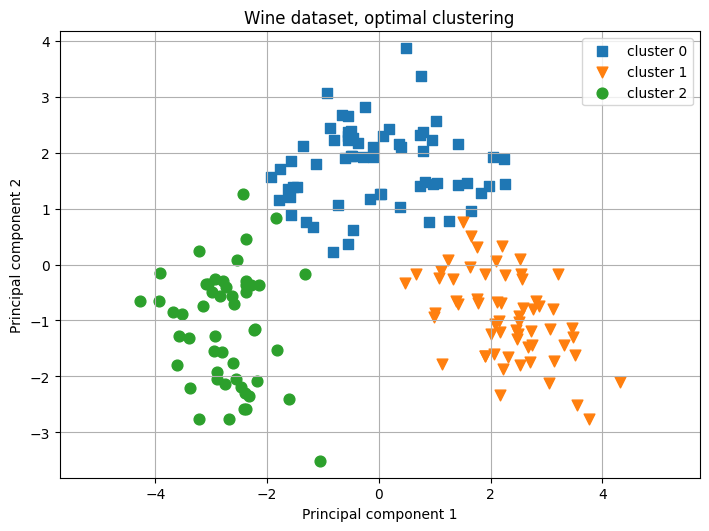

Optimal number of clusters: 3 

- Cluster 0
  36.5169% of total patterns
  Number of patterns with real class A: 0
  Number of patterns with real class B: 65
  Number of patterns with real class C: 0

- Cluster 1
  34.8315% of total patterns
  Number of patterns with real class A: 59
  Number of patterns with real class B: 3
  Number of patterns with real class C: 0

- Cluster 2
  28.6517% of total patterns
  Number of patterns with real class A: 0
  Number of patterns with real class B: 3
  Number of patterns with real class C: 48



In [ ]:
pcs = [0,1]

cluster_names = ["cluster "+str(c) for c in range(n_clusters)]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

fig = plt.figure(figsize=(7,5))
for i in range(n_clusters):
    inds = np.where(kmeans.labels_ == i)[0]
    plt.scatter(X_pca[inds, pcs[0]],
                X_pca[inds, pcs[1]],
                s = 60,
                c = colors[i],
                marker = markers[i],
                alpha = 1.0,
                cmap='RdYlGn',
                label = cluster_names[i])

plt.legend(); plt.grid(); plt.axis('equal'); plt.tight_layout()
plt.title('Wine dataset, optimal clustering')
plt.xlabel('Principal component '+str(pcs[0]+1))
plt.ylabel('Principal component '+str(pcs[1]+1))
plt.show()

print('Optimal number of clusters:', n_clusters, '\n')

unique_y = np.unique(y)
ids_clusters = kmeans.labels_
for i in np.unique(ids_clusters):
    inds = (np.where(np.array(ids_clusters) == i))[0]
    print('\033[1m'+'- Cluster %d' % i + '\033[0m')
    print('  %g%% of total patterns' % (100*len(inds)/len(ids_clusters)))
    for real_class in unique_y:
        print('  Number of patterns with real class %c: %d' % (real_class, (list(y[inds])).count(real_class)))
    print()

In [ ]:
kmeans.cluster_centers_

array([[-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02]])

In [ ]:
df = pd.DataFrame(data=np.hstack((X,np.reshape(ids_clusters, (len(ids_clusters),1)))),
                  columns=attribute_columns+['cluster_id'])
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline,cluster_id
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0,0.0
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,0.0
165,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520.0,2.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0,1.0
129,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0,0.0


## Interpretation of the obtained clusters

In [ ]:
df.groupby('cluster_id').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
cluster_id,,,,,,,,,,,,,
0.0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1.0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2.0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


In [ ]:
kmeans.cluster_centers_

array([[-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02]])

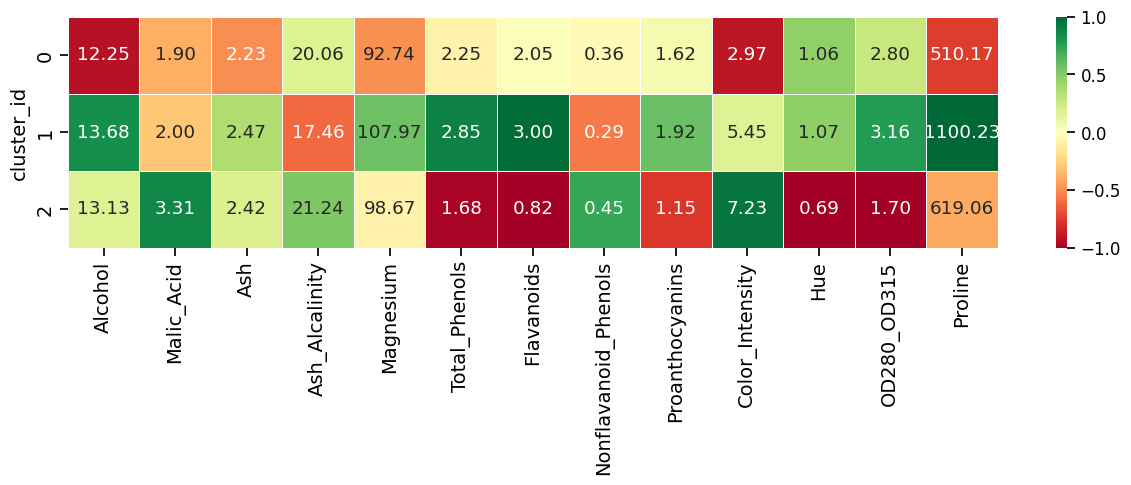

In [ ]:
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(15,n_clusters))
aux = pd.DataFrame(data=np.hstack((X,np.reshape(ids_clusters, (len(ids_clusters),1)))),
                   columns=attribute_columns+['cluster_id'])
df_aux = pd.DataFrame(data=np.hstack((X_std,np.reshape(ids_clusters, (len(ids_clusters),1)))),
                      columns=attribute_columns+['cluster_id'])
aa = sns.heatmap(df_aux.groupby('cluster_id').mean(),
                 annot = aux.groupby('cluster_id').mean(),
                 vmin=-1, vmax=1,
                 cmap='RdYlGn',
                 linewidths=.5, fmt='.2f')
plt.xticks(fontsize=14)
plt.yticks(np.array(range(n_clusters))+0.5,range(n_clusters),fontsize=14)
plt.ylabel('cluster_id', fontsize=14);

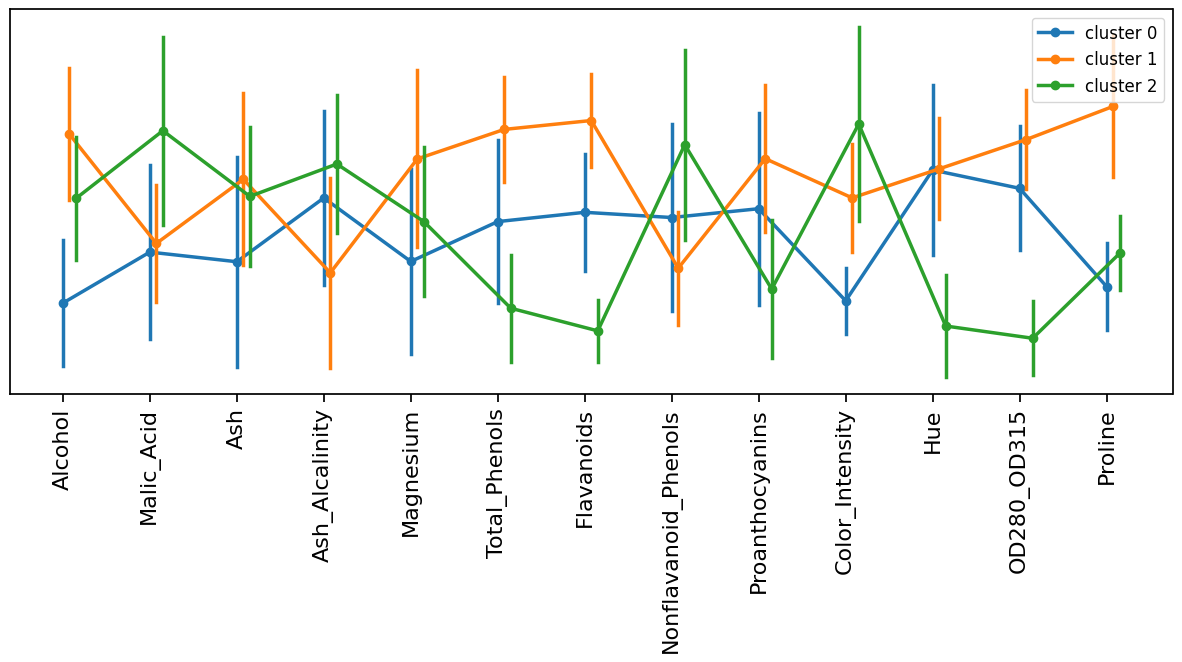

In [ ]:
mean_aux = df_aux.groupby('cluster_id').mean().values.T
std_aux  = df_aux.groupby('cluster_id').std().values.T

plt.figure(figsize=(15,5))
for c in range(n_clusters):
    plot_shift = .15/(n_clusters-1)*c
    plt.plot(np.arange(mean_aux.shape[0])+plot_shift,
             mean_aux[:,c], '-o',
             color=colors[c], label=cluster_names[c])
    for i in range(mean_aux.shape[0]):
        plt.plot(2*[i+plot_shift], mean_aux[i,c]+[-std_aux[i,c], std_aux[i,c]],
                 color=colors[c])
plt.xticks(range(mean_aux.shape[0]), attributes_names,
           rotation=90, fontsize=16)
plt.legend(fontsize=12)
plt.yticks([]);

## Interpretation of the clusters using a decision tree (XAI, eXplainable AI)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
if COLAB:
  aux = "'https://docs.google.com/uc?export=download&id=1XRtjz0L2oiAmKupnxIclUkwiBgahYcEs&confirm=t'"
  !wget $aux -O ./libreria_aux_arboles.py
  aux = "'https://docs.google.com/uc?export=download&id=1TTg21AIw2HzrBaN0B02bG-SX09eCn79e&confirm=t'"
  !wget $aux -O ./my_library.py

  from graphviz import Source

from libreria_aux_arboles import tree_to_code, tree_to_pseudo

startbold = '\033[1m'
endbold = '\033[0m'

--2023-11-03 19:43:29--  https://docs.google.com/uc?export=download&id=1XRtjz0L2oiAmKupnxIclUkwiBgahYcEs&confirm=t
Resolving docs.google.com (docs.google.com)... 172.253.122.101, 172.253.122.100, 172.253.122.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.122.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v4cr5dr6m2oqlkuqqbqqs35613dffj9c/1699040550000/17112108692206476645/*/1XRtjz0L2oiAmKupnxIclUkwiBgahYcEs?e=download&uuid=58fda664-9acb-4046-8216-bf1e14a0bf9b [following]
--2023-11-03 19:43:30--  https://doc-0s-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v4cr5dr6m2oqlkuqqbqqs35613dffj9c/1699040550000/17112108692206476645/*/1XRtjz0L2oiAmKupnxIclUkwiBgahYcEs?e=download&uuid=58fda664-9acb-4046-8216-bf1e14a0bf9b
Resolving doc-0s-8k-docs.googleusercontent.com (doc-0s-8k-docs.googleusercontent.com)... 172.253.63.1

def tree(Alcohol, Malic_Acid, Ash, Ash_Alcalinity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Hue, OD280_OD315, Proline):
  if Proline <= 755.0:
    if OD280_OD315 <= 2.190000057220459:
      if Color_Intensity <= 3.8249999284744263:
        return [[5. 0. 1.]]
      else:  # if Color_Intensity > 3.8249999284744263
        return [[ 0.  0. 43.]]
    else:  # if OD280_OD315 > 2.190000057220459
      return [[58.  3.  1.]]
  else:  # if Proline > 755.0
    if Flavanoids <= 2.165000081062317:
      return [[2. 0. 6.]]
    else:  # if Flavanoids > 2.165000081062317
      return [[ 0. 59.  0.]]


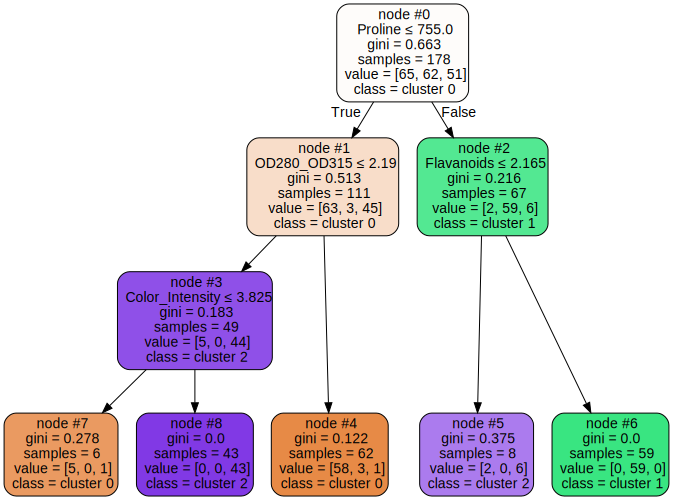

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5) # min_samples_leaf=0.15)

clf = clf.fit(X, ids_clusters)

tree_to_code(clf, attributes_names, start_bold=startbold, end_bold=endbold)

if COLAB:
    display(Source(export_graphviz(clf, out_file=None,
                                   feature_names=attributes_names,
                                   class_names=cluster_names,
                                   filled=True, rounded=True,
                                   special_characters=True,
                                   impurity=True,
                                   leaves_parallel=True,
                                   rotate=False,
                                   node_ids=True)))

In [ ]:
clf.score(X, ids_clusters)

0.9606741573033708

## Obtaining the set of rules equivalent to the tree

In [ ]:
from my_library import get_rules_from_tree

rules = get_rules_from_tree(clf, attributes_names, cluster_names, X, ids_clusters)

print(len(rules), "rules:\n")
for item in rules.items():
    print('\033[1m' + "* ", item[1][0], '\033[0m')
    for c in item[1][1]:
        print("     "+c[0]+":", c[1], "cases (%.2f%%)" % (100*c[2]))

5 rules:

*  (Proline <= 755.0000) and (OD280_OD315 <= 2.1900) and (Color_Intensity <= 3.8250) 
     cluster 0: 5 cases (83.33%)
     cluster 1: 0 cases (0.00%)
     cluster 2: 1 cases (16.67%)
*  (Proline <= 755.0000) and (OD280_OD315 <= 2.1900) and (Color_Intensity > 3.8250) 
     cluster 0: 0 cases (0.00%)
     cluster 1: 0 cases (0.00%)
     cluster 2: 43 cases (100.00%)
*  (Proline <= 755.0000) and (OD280_OD315 > 2.1900) 
     cluster 0: 58 cases (93.55%)
     cluster 1: 3 cases (4.84%)
     cluster 2: 1 cases (1.61%)
*  (Proline > 755.0000) and (Flavanoids <= 2.1650) 
     cluster 0: 2 cases (25.00%)
     cluster 1: 0 cases (0.00%)
     cluster 2: 6 cases (75.00%)
*  (Proline > 755.0000) and (Flavanoids > 2.1650) 
     cluster 0: 0 cases (0.00%)
     cluster 1: 59 cases (100.00%)
     cluster 2: 0 cases (0.00%)
